# Previsão do preço de casas com machine learning

In [87]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

Fazendo o download do dataset

In [59]:
house_data = pd.read_csv("https://gist.githubusercontent.com/OrenBochman/fcf25a2a356842fb0f306974e53c2eab/raw/61dc4eb6ee95930b23287e515ee059207bc49905/House_Price.csv")
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Verificando a quantidade de valores vazios por porcentagem de cada coluna

In [60]:
(house_data.isnull().sum()/house_data.shape[0]).sort_values(ascending=False).head(20)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Id              0.000000
dtype: float64

Eliminando as colunas com mais de 10% dos valores zerados

In [61]:
delete = house_data.columns[(house_data.isnull().sum()/house_data.shape[0]) > 0.1]
delete

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [62]:
house_data = house_data.drop(delete, axis=1)
house_data

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


Verificando as colunas numéricas

In [63]:
columns = house_data.columns[house_data.dtypes != 'object']
columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Fazendo uma nova base

In [69]:
base = house_data.loc[:,columns]
base

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


Verificando as colunas com valores zerados e substituindo os zeros por -1

In [71]:
base.isnull().sum().sort_values(ascending=False).head(3)

GarageYrBlt    81
MasVnrArea      8
Id              0
dtype: int64

In [74]:
base = base.fillna(-1)
base

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


Construindo as features e os labels

In [75]:
x = base.drop("SalePrice", axis=1)
y = base["SalePrice"]

Criando sets de treino e de teste

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Algoritimo de Regressão Linear

In [ ]:
from sklearn.linear_model import LinearRegression as lr

lr = lr().fit(x_train, y_train)

y_lr = lr.predict(x_test)

Algoritimo de Àrvore de Decisão

In [84]:
from sklearn import tree

dt = tree.DecisionTreeRegressor().fit(x_train, y_train)

y_dt = dt.predict(x_test)

Algoritimo de KNN

In [85]:
from sklearn.neighbors import KNeighborsRegressor as KNN

knn = KNN().fit(x_train, y_train)

y_knn = knn.predict(x_test)

Modelo Deep Learning de Regressão

In [90]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.mae,
              metrics="mae")

model.fit(x_train, y_train, epochs=200, verbose=0)

In [98]:
y_rn = model.predict(x_test)

14/14 [==============================] - 0s 2ms/step


Analizando as funções de perda (MAE e MSE)

In [95]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_lr, mse_lr = mean_absolute_error(y_test, y_lr), mean_squared_error(y_test, y_lr)

print("O mae do algoritimo de regressão foi: {} \n O mse do algoritimo de regressão foi : {}".format(mae_lr,mse_lr))

O mae do algoritimo de regressão foi: 22764.026236544087 
 O mse do algoritimo de regressão foi : 1197736462.239613


In [97]:
mae_dt, mse_dt = mean_absolute_error(y_test, y_dt), mean_squared_error(y_test, y_dt)

print("O mae do algoritimo de árvore de decisão foi: {} \n O mse do algoritimo de árvore de decisão foi : {}".format(mae_dt,mse_dt))

O mae do algoritimo de árvore de decisão foi: 26559.73515981735 
 O mse do algoritimo de árvore de decisão foi : 1797530013.56621


In [99]:
mae_knn, mse_knn = mean_absolute_error(y_test, y_knn), mean_squared_error(y_test, y_knn)

print("O mae do algoritimo de KNN foi: {} \n O mse do algoritimo de KNN foi : {}".format(mae_knn,mse_knn))

O mae do algoritimo de KNN foi: 29868.65433789955 
 O mse do algoritimo de KNN foi : 2267112051.1511416


In [100]:
mae_rn, mse_rn = mean_absolute_error(y_test, y_rn), mean_squared_error(y_test, y_rn)

print("O mae do modelo de deep learning foi: {} \n O mse do modelo de deep learning foi : {}".format(mae_rn,mse_rn))

O mae do modelo de deep learning foi: 24205.68073986872 
 O mse do modelo de deep learning foi : 1323293862.0145447


Vamos vizualizar os dados obtidos

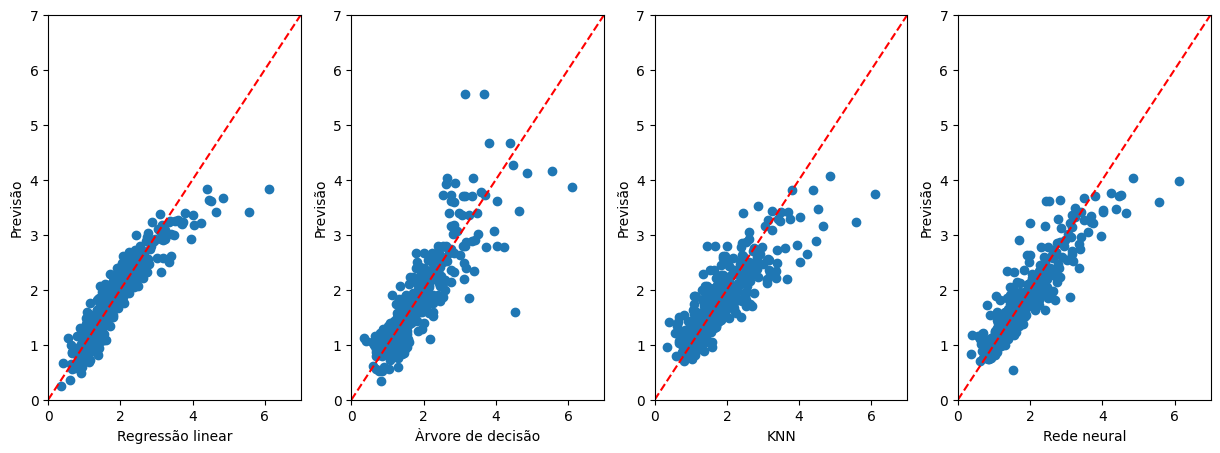

In [103]:
fig, ax = plt.subplots(ncols=4,figsize=(15,5))

ax[0].scatter(y_test/100000,y_lr/100000)

ax[0].plot([0,700000],[0,700000],'--r')

ax[1].scatter(y_test/100000,y_dt/100000)

ax[1].plot([0,700000],[0,700000],'--r')

ax[2].scatter(y_test/100000,y_knn/100000)

ax[2].plot([0,700000],[0,700000],'--r')

ax[3].scatter(y_test/100000,y_rn/100000)

ax[3].plot([0,700000],[0,700000],'--r')

ax[0].set(xlim=(0, 7),ylim=(0, 7))

ax[0].set_xlabel('Regressão linear')

ax[0].set_ylabel('Previsão')

ax[1].set(xlim=(0, 7),ylim=(0, 7))

ax[1].set_xlabel('Àrvore de decisão')

ax[1].set_ylabel('Previsão')

ax[2].set(xlim=(0, 7),ylim=(0, 7))

ax[2].set_xlabel('KNN')

ax[2].set_ylabel('Previsão')

ax[3].set(xlim=(0, 7),ylim=(0, 7))

ax[3].set_xlabel('Rede neural')

ax[3].set_ylabel('Previsão')

plt.show()